In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_excel('Ecommerce.xlsx')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [7]:
nominal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for col in range(0,5):
    print(nominal[col])
    print(df[nominal[col]].unique())
    print()

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']



We can see that there are some values that is written 2 times in 2 different ways:<br>
- 'Mobile phone' and 'Phone' in PreferredLoginDevice<br>
- 'CC' and 'Credit Card' in PreferredPaymentMode<br>
- 'COD' and 'Cash on Delivery' in PreferredPaymentMode<br>
- 'Mobile' and 'Mobile Phone' in PreferedOrderCat<br>

So I am going to fix that problem by writing them in the same way

In [8]:
df.replace('Phone', 'Mobile Phone', inplace=True)
df.replace('CC', 'Credit Card', inplace=True)
df.replace('COD', 'Cash on Delivery', inplace=True)
df.replace('Mobile', 'Mobile Phone', inplace=True)

In [9]:
nominal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for col in range(0,5):
    print(nominal[col])
    print(df[nominal[col]].unique())
    print()

PreferredLoginDevice
['Mobile Phone' 'Computer']

PreferredPaymentMode
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Gender
['Female' 'Male']

PreferedOrderCat
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
['Single' 'Divorced' 'Married']



In [10]:
df_dropped = df.dropna(how='any')
df_dropped

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Mobile Phone,1,11.0,Cash on Delivery,Male,2.0,3,Mobile Phone,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [11]:
df_dropped.Churn.value_counts()

0    3143
1     631
Name: Churn, dtype: int64

I want to fill the missing values with the attribute mean of the samples belonging to the same class

In [12]:
df_0=df.copy()
df_1=df.copy()

In [13]:
toDrop0 = df_0[ (df_0['Churn'] == 1) ].index
df_0.drop(toDrop0, inplace=True)

In [14]:
toDrop1 = df_1[ (df_1['Churn'] == 0) ].index
df_1.drop(toDrop1, inplace=True)

In [15]:
df_0['Tenure'].fillna(df_0['Tenure'].mean(skipna=True), inplace=True)
df_0['WarehouseToHome'].fillna(df_0['WarehouseToHome'].mean(skipna=True), inplace=True)
df_0['HourSpendOnApp'].fillna(df_0['HourSpendOnApp'].mean(skipna=True), inplace=True)
df_0['OrderAmountHikeFromlastYear'].fillna(df_0['OrderAmountHikeFromlastYear'].mean(skipna=True), inplace=True)
df_0['CouponUsed'].fillna(df_0['CouponUsed'].mean(skipna=True), inplace=True)
df_0['OrderCount'].fillna(df_0['OrderCount'].mean(skipna=True), inplace=True)
df_0['DaySinceLastOrder'].fillna(df_0['DaySinceLastOrder'].mean(skipna=True), inplace=True)
df_1['Tenure'].fillna(df_1['Tenure'].mean(skipna=True), inplace=True)
df_1['WarehouseToHome'].fillna(df_1['WarehouseToHome'].mean(skipna=True), inplace=True)
df_1['HourSpendOnApp'].fillna(df_1['HourSpendOnApp'].mean(skipna=True), inplace=True)
df_1['OrderAmountHikeFromlastYear'].fillna(df_1['OrderAmountHikeFromlastYear'].mean(skipna=True), inplace=True)
df_1['CouponUsed'].fillna(df_1['CouponUsed'].mean(skipna=True), inplace=True)
df_1['OrderCount'].fillna(df_1['OrderCount'].mean(skipna=True), inplace=True)
df_1['DaySinceLastOrder'].fillna(df_1['DaySinceLastOrder'].mean(skipna=True), inplace=True)

In [16]:
df_filled=pd.concat([df_0, df_1])
df_filled

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
26,50027,0,8.000000,Mobile Phone,3,6.000000,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.000000,6.0,172.95
27,50028,0,11.502334,Mobile Phone,3,12.000000,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.000000,5.0,123.06
28,50029,0,18.000000,Mobile Phone,1,15.353931,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.000000,15.0,123.48
29,50030,0,5.000000,Computer,3,14.000000,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.000000,7.0,189.98
30,50031,0,2.000000,Computer,1,6.000000,Cash on Delivery,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.000000,9.0,143.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,55599,1,1.000000,Computer,3,16.000000,E wallet,Male,3.0,4,Mobile Phone,5,Married,3,0,20.0,2.0,2.000000,1.0,142.90
5602,55603,1,1.000000,Mobile Phone,1,8.000000,Credit Card,Male,3.0,4,Mobile Phone,1,Married,11,1,15.0,3.0,3.000000,3.0,172.87
5604,55605,1,20.000000,Mobile Phone,1,14.000000,Cash on Delivery,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.000000,9.0,148.39
5612,55613,1,14.000000,Computer,3,8.000000,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.0,2.000000,2.0,192.28


In [17]:
df_filled.sort_values(by = 'CustomerID',ascending = True)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,159.93
1,50002,1,3.379469,Mobile Phone,1,8.0,UPI,Male,3.000000,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.000000,120.90
2,50003,1,3.379469,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.000000,120.28
3,50004,1,0.000000,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134.07
4,50005,1,0.000000,Mobile Phone,1,12.0,Credit Card,Male,2.961798,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.000000,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,150.71
5626,55627,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.807406,224.91
5627,55628,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186.42
5628,55629,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,178.90


We can drop che column CustomerID because there's already an id

In [18]:
df_dropped.drop(['CustomerID'], axis=1, inplace=True)

C:\Users\meoli\AppData\Local\Temp\ipykernel_10500\4208422953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.drop(['CustomerID'], axis=1, inplace=True)


In [19]:
df_filled.drop(['CustomerID'], axis=1, inplace=True)

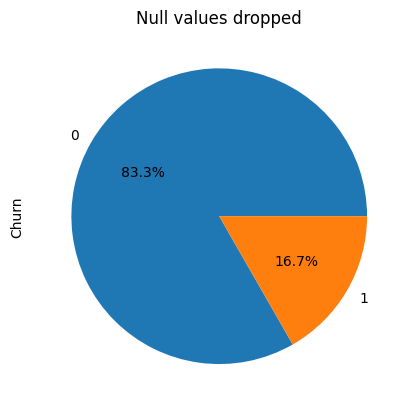

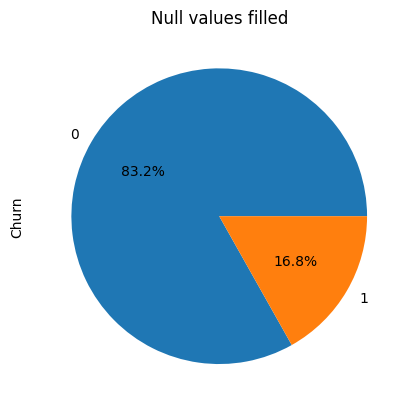

In [20]:
values_dropped=df_dropped['Churn'].value_counts()
values_dropped.plot(kind='pie', autopct="%.1f%%")
plt.title('Null values dropped')
plt.show()
values_filled=df_filled['Churn'].value_counts()
values_filled.plot(kind='pie', autopct="%.1f%%")
plt.title('Null values filled')
plt.show()

We can see that in both cases the distribution of the two classes is the same

C:\Users\meoli\AppData\Local\Temp\ipykernel_10500\562145539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_dropped.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


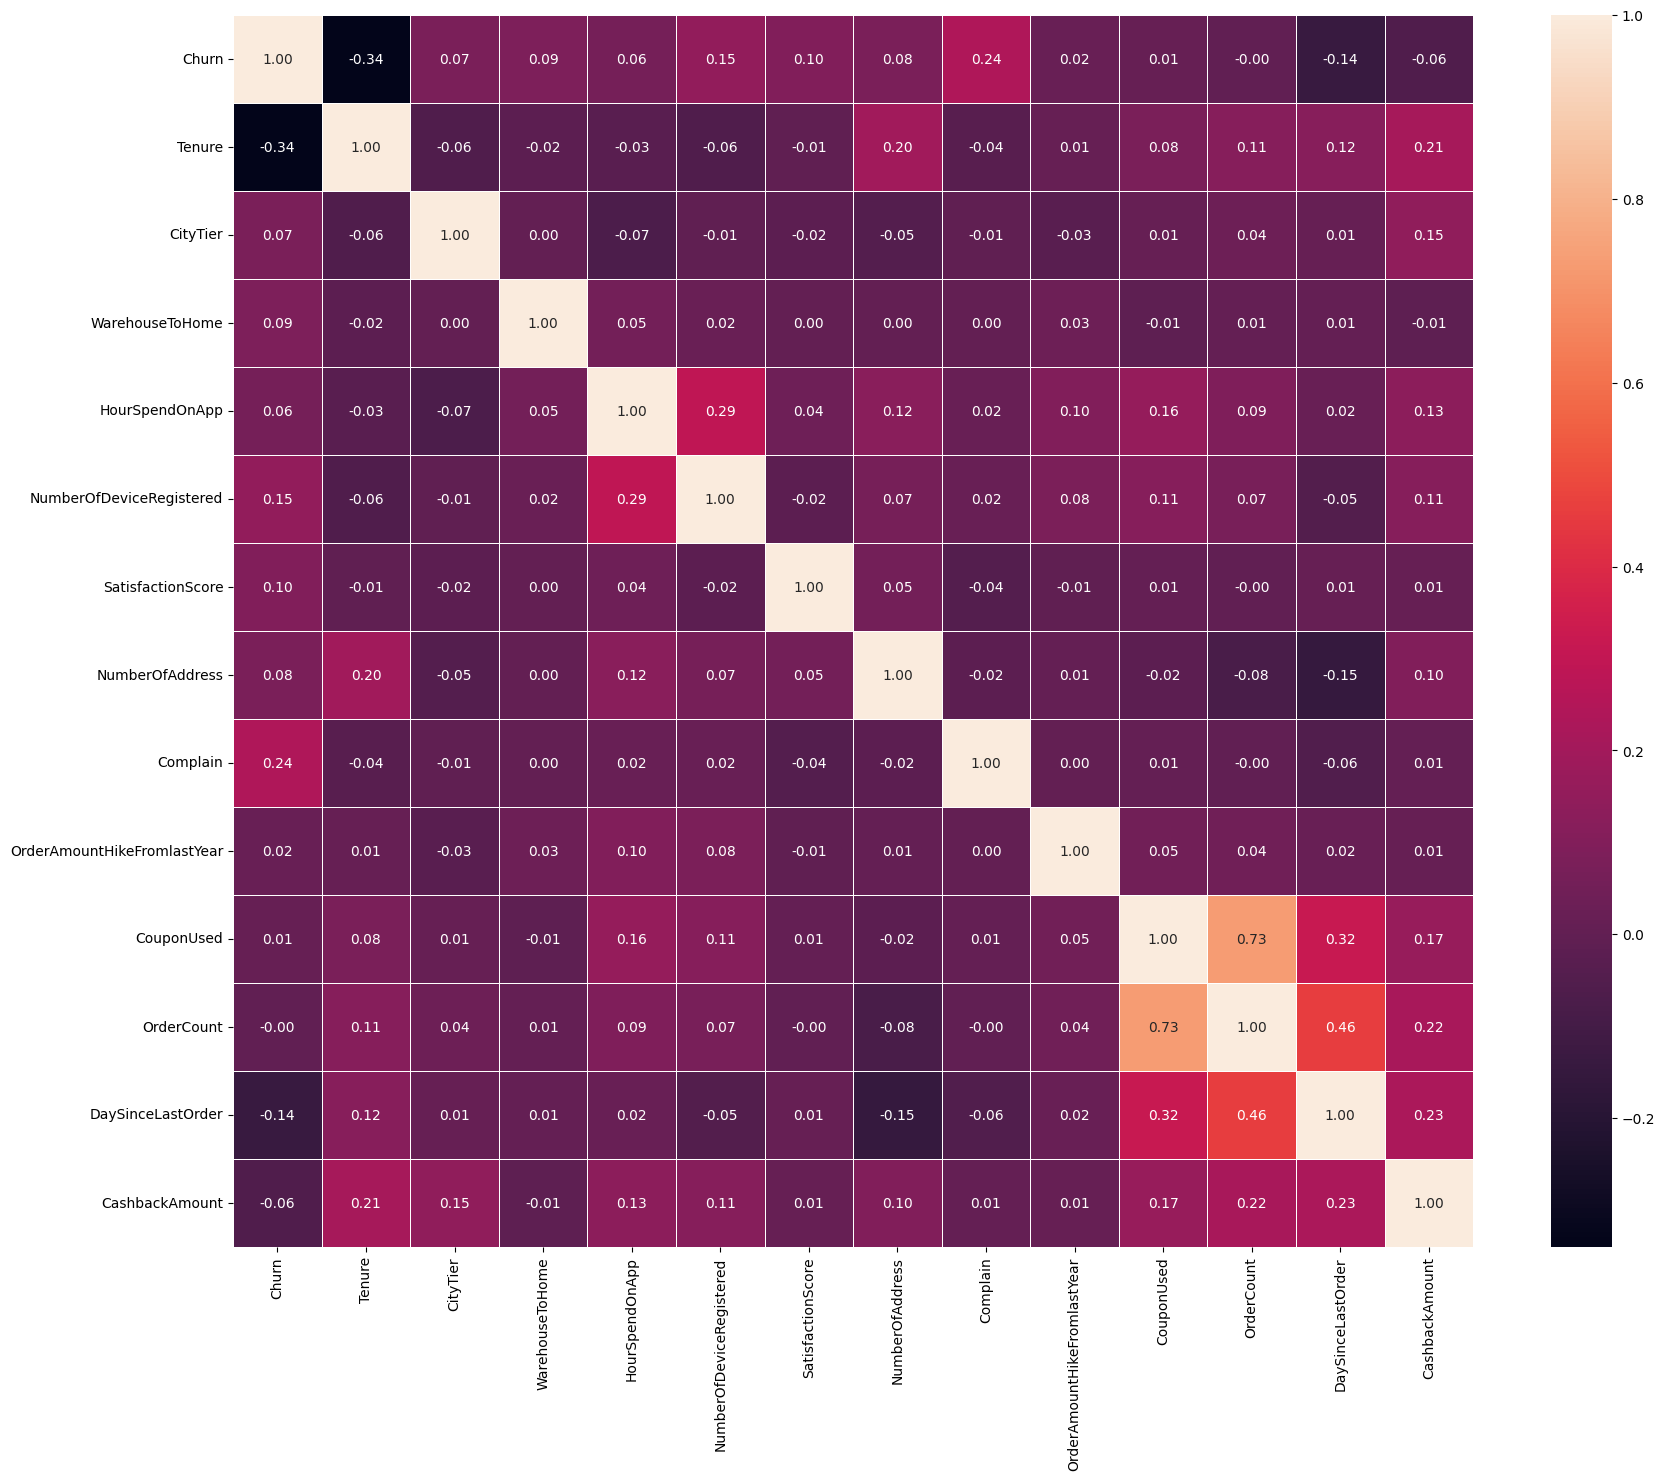

In [21]:
f,ax = plt.subplots(figsize=(20, 16))
sb.heatmap(df_dropped.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

C:\Users\meoli\AppData\Local\Temp\ipykernel_10500\4260082118.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_filled.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


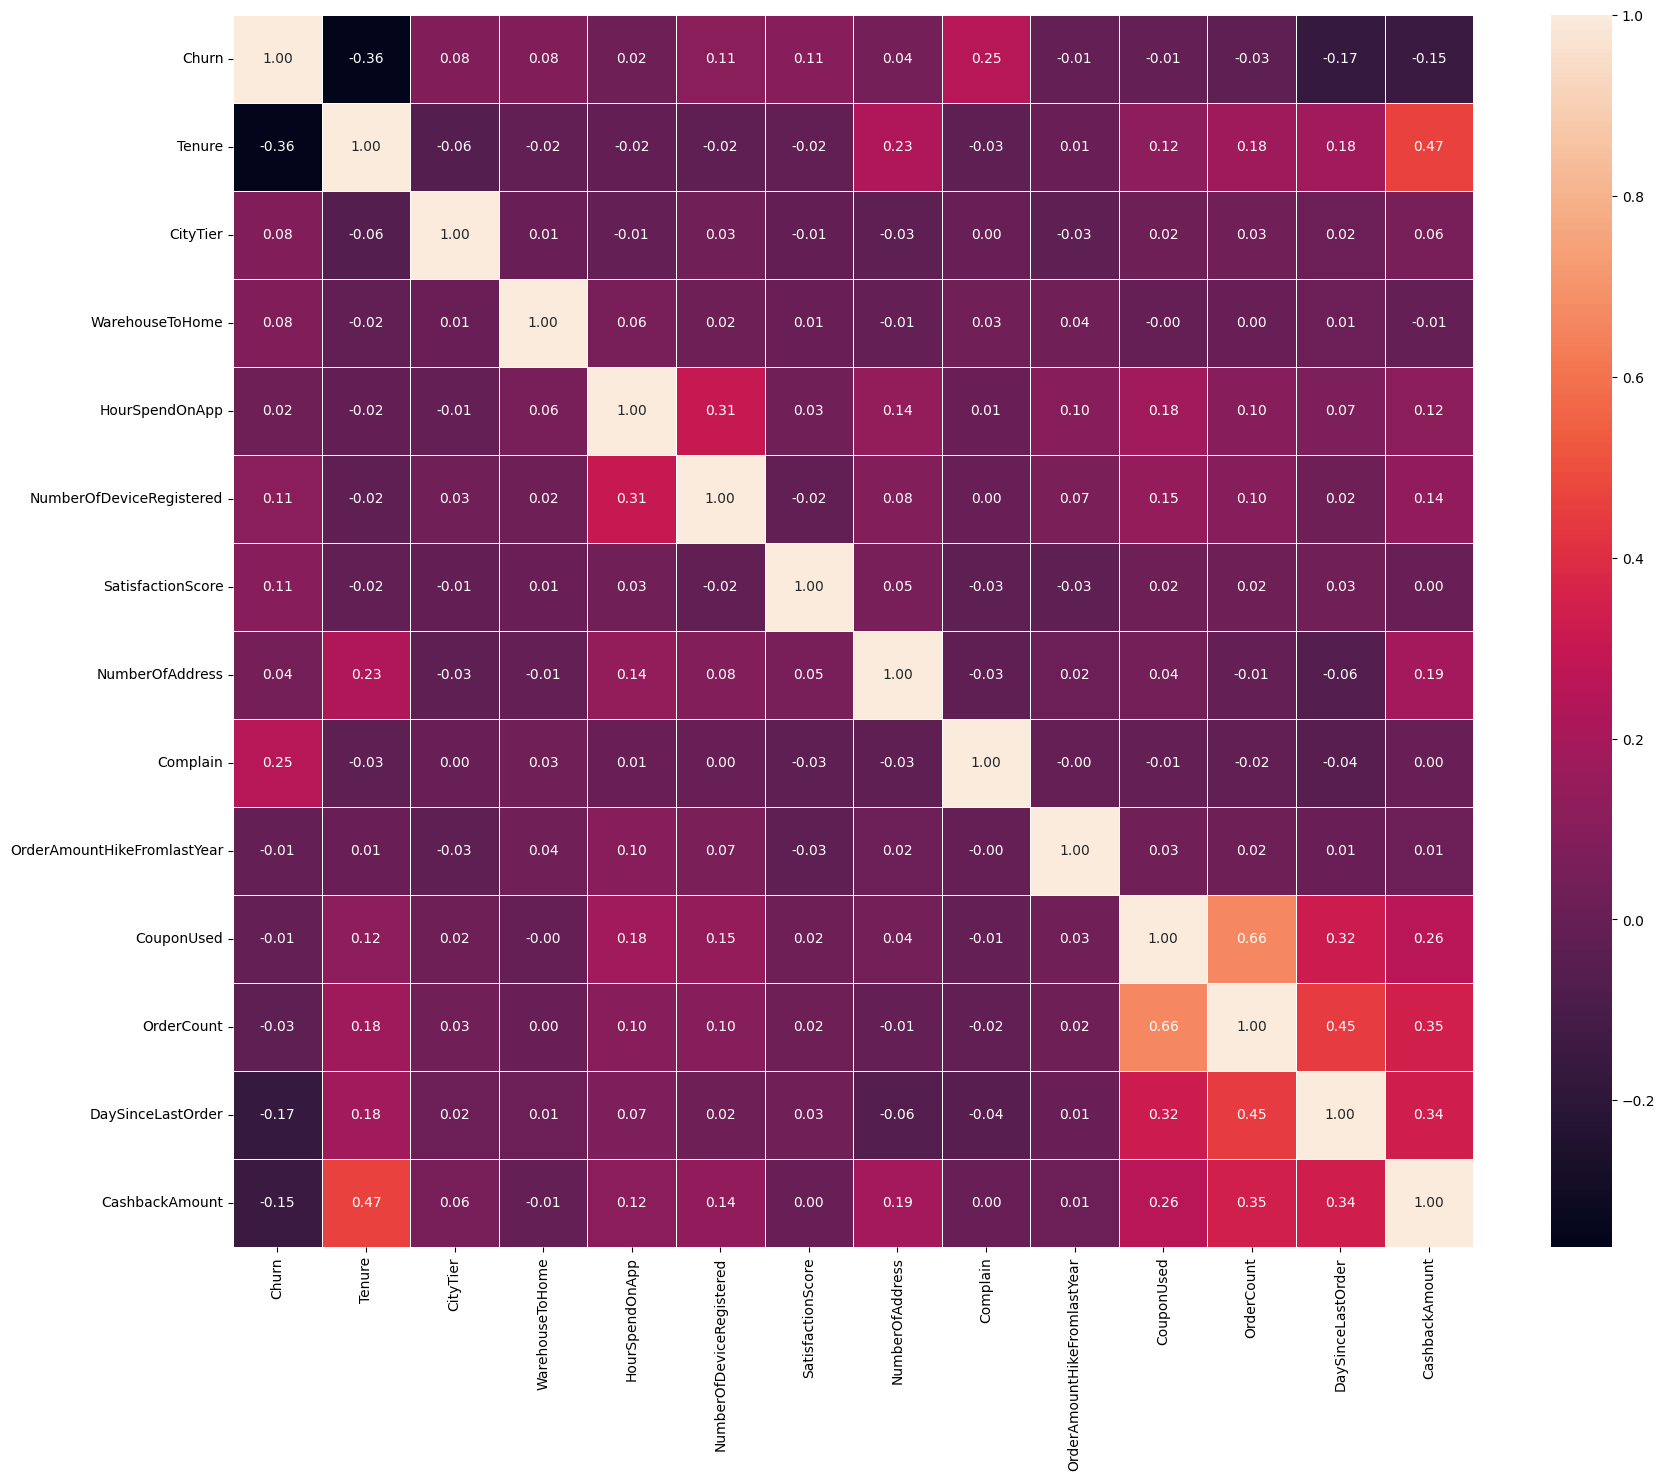

In [22]:
f,ax = plt.subplots(figsize=(20, 16))
sb.heatmap(df_filled.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [23]:
df_dropped = pd.get_dummies(df_dropped,columns = nominal)
df_dropped 

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,1,0,0,0,1,0,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,1,0,0,1,0,0,0,0,1
5,1,0.0,1,22.0,3.0,5,5,2,1,22.0,...,1,0,0,0,0,1,0,0,0,1
11,1,11.0,1,6.0,3.0,4,3,10,1,13.0,...,0,1,1,0,0,0,0,0,0,1
12,1,0.0,1,11.0,2.0,3,3,2,1,13.0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,3,12.0,2.0,5,3,2,0,19.0,...,1,0,0,0,0,1,0,0,0,1
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,...,0,1,0,0,1,0,0,0,1,0
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,...,0,1,0,0,1,0,0,0,1,0
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,...,0,1,0,0,1,0,0,0,1,0


In [24]:
df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3774.0,0.167197,0.373201,0.0,0.000,0.00,0.00,1.00
Tenure,3774.0,8.776895,7.678508,0.0,1.000,8.00,13.00,51.00
CityTier,3774.0,1.707737,0.936725,1.0,1.000,1.00,3.00,3.00
WarehouseToHome,3774.0,15.743773,8.594330,5.0,9.000,14.00,21.00,127.00
HourSpendOnApp,3774.0,2.981187,0.722158,0.0,2.000,3.00,3.00,5.00
NumberOfDeviceRegistered,3774.0,3.754107,1.025233,1.0,3.000,4.00,4.00,6.00
SatisfactionScore,3774.0,3.056439,1.389730,1.0,2.000,3.00,4.00,5.00
NumberOfAddress,3774.0,4.216481,2.562142,1.0,2.000,3.00,6.00,22.00
Complain,3774.0,0.282194,0.450127,0.0,0.000,0.00,1.00,1.00
OrderAmountHikeFromlastYear,3774.0,15.727610,3.629910,11.0,13.000,15.00,18.00,26.00


In [25]:
df_filled = pd.get_dummies(df_filled,columns = nominal)
df_filled 

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
26,0,8.000000,3,6.000000,3.0,3,4,2,0,13.0,...,0,1,1,0,0,0,0,1,0,0
27,0,11.502334,3,12.000000,2.0,3,3,3,1,20.0,...,0,1,0,0,1,0,0,1,0,0
28,0,18.000000,1,15.353931,2.0,3,4,9,0,18.0,...,0,1,0,0,1,0,0,0,1,0
29,0,5.000000,3,14.000000,2.0,3,2,2,0,14.0,...,1,0,1,0,0,0,0,0,0,1
30,0,2.000000,1,6.000000,2.0,3,3,2,0,13.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,1,1.000000,3,16.000000,3.0,4,5,3,0,20.0,...,0,1,0,0,0,1,0,0,1,0
5602,1,1.000000,1,8.000000,3.0,4,1,11,1,15.0,...,0,1,0,0,0,1,0,0,1,0
5604,1,20.000000,1,14.000000,4.0,4,3,10,0,12.0,...,0,1,0,0,0,1,0,0,1,0
5612,1,14.000000,3,8.000000,4.0,4,3,9,0,13.0,...,0,1,0,0,1,0,0,0,1,0


In [26]:
df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.000000,0.000000,1.00
Tenure,5630.0,10.134576,8.397167,0.0,3.00,9.000000,15.000000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.000000,3.000000,3.00
WarehouseToHome,5630.0,15.653709,8.341227,5.0,9.00,14.000000,20.000000,127.00
HourSpendOnApp,5630.0,2.931637,0.705392,0.0,2.00,3.000000,3.000000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.000000,4.000000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.000000,4.000000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.000000,6.000000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.000000,1.000000,1.00
OrderAmountHikeFromlastYear,5630.0,15.708478,3.587930,11.0,13.00,15.000000,18.000000,26.00


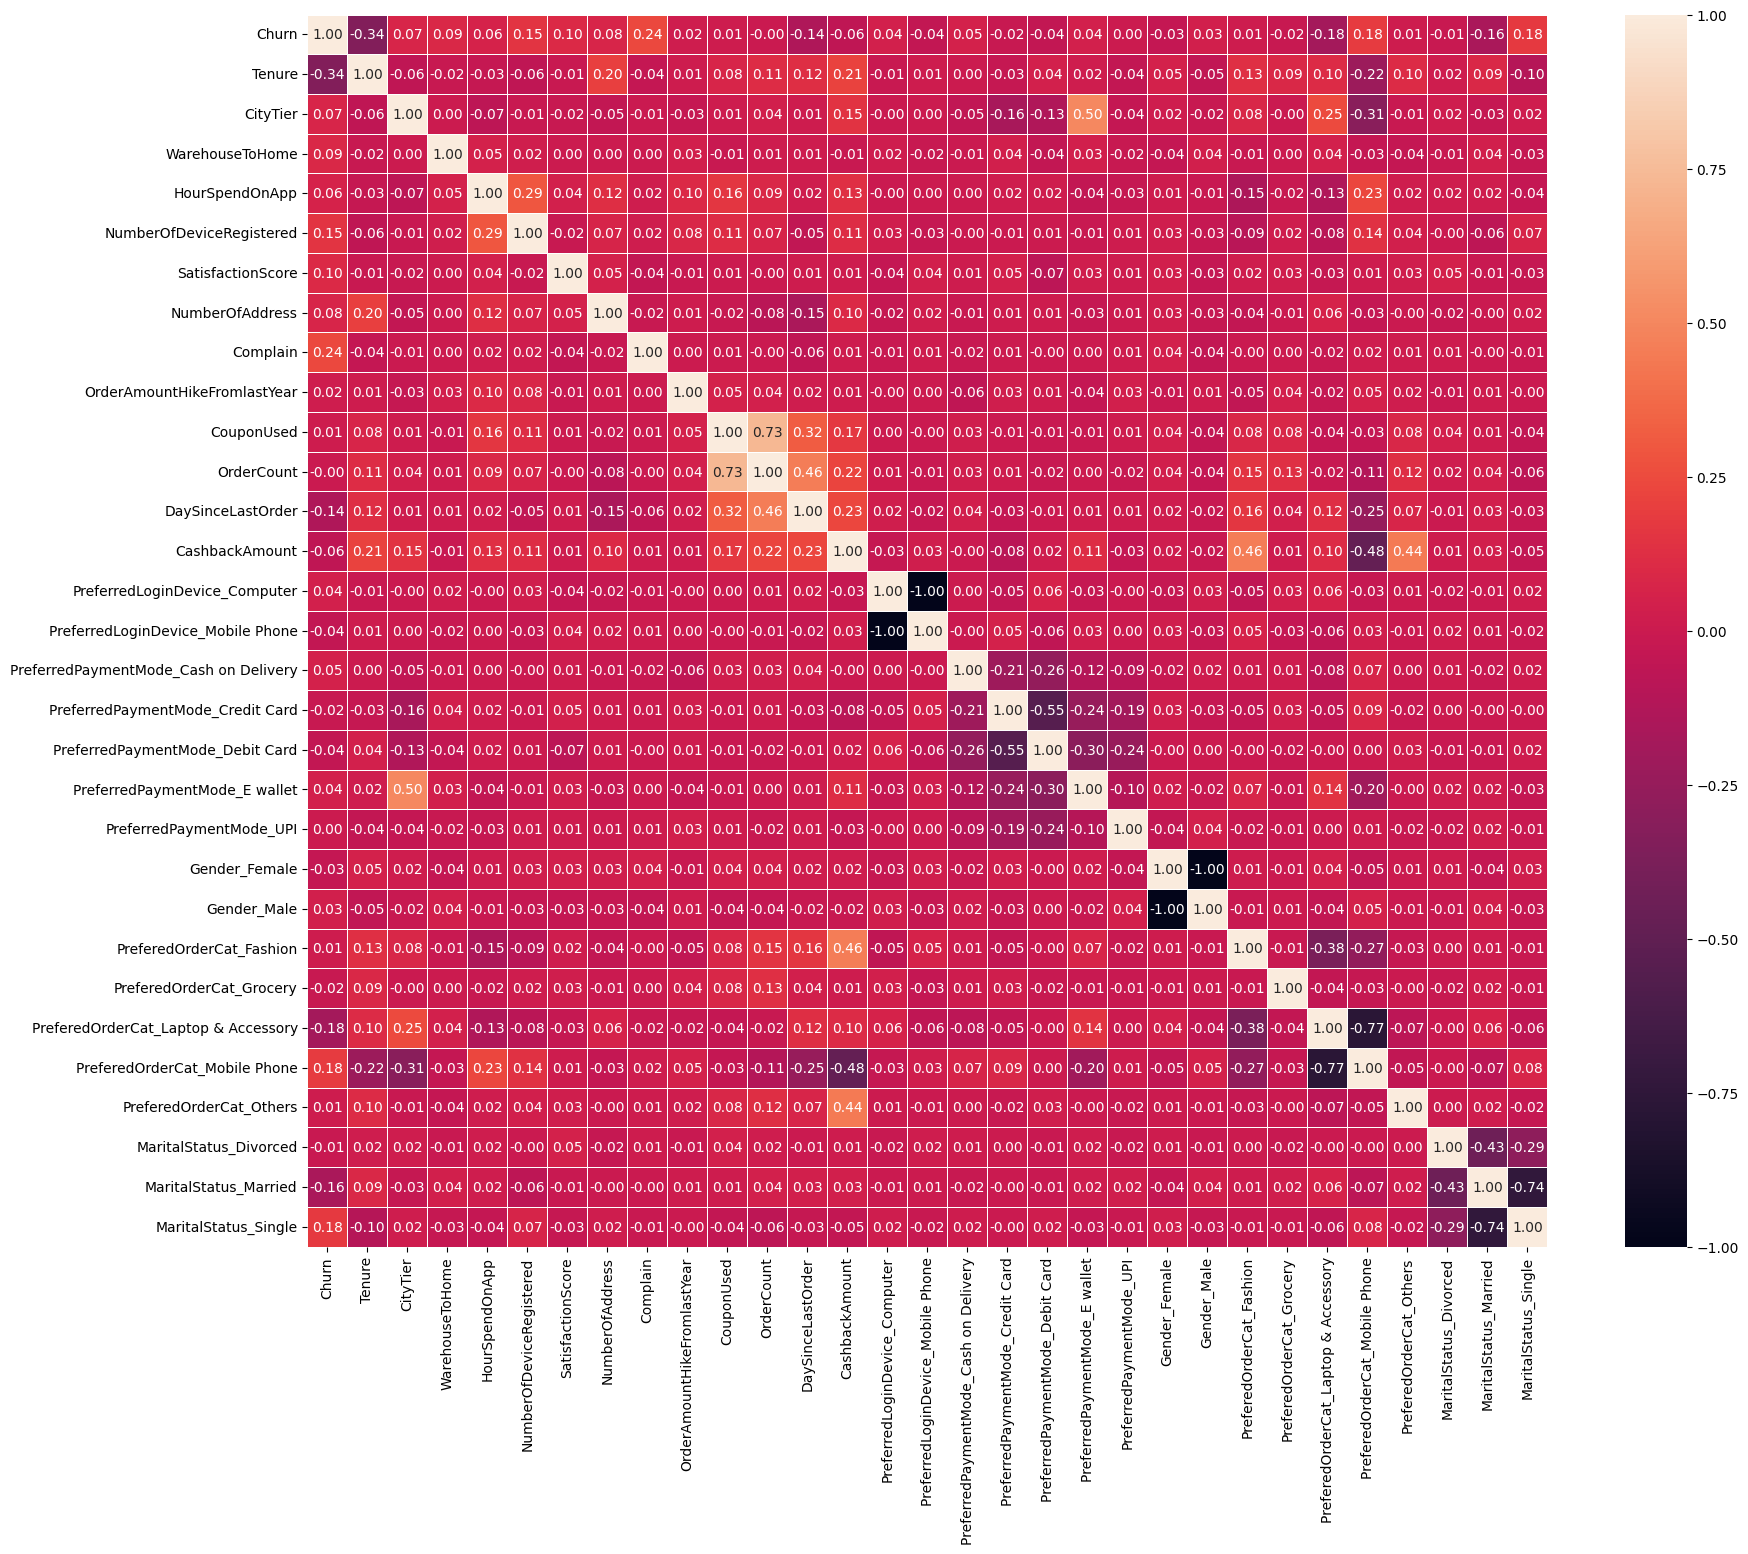

In [27]:
f,ax = plt.subplots(figsize=(20, 16))
sb.heatmap(df_dropped.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

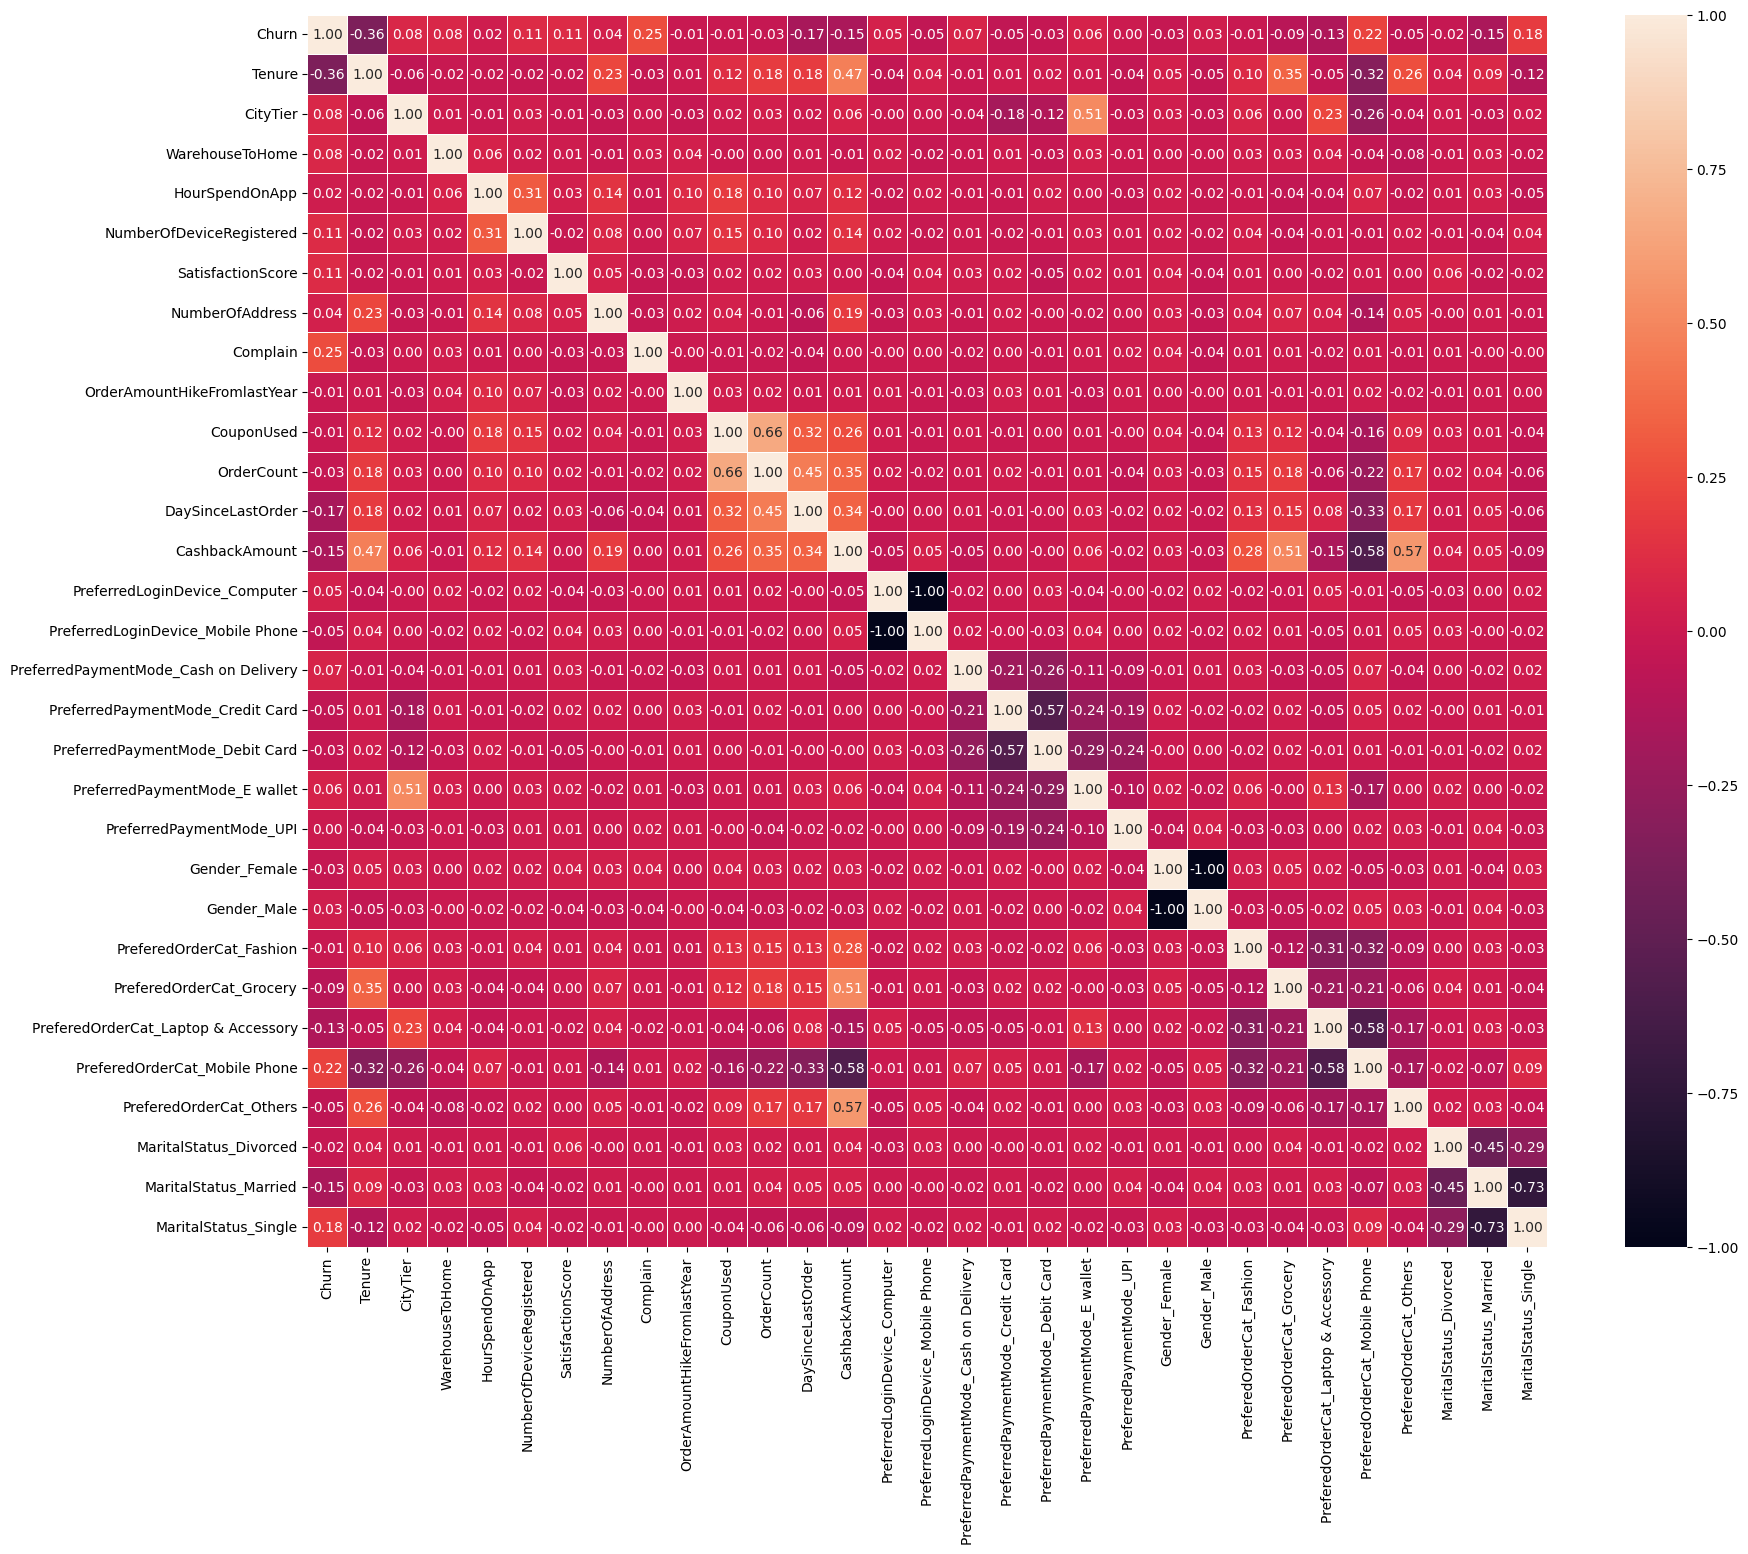

In [28]:
f,ax = plt.subplots(figsize=(20, 16))
sb.heatmap(df_filled.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

I concluded the preprocessing operations. Now I can extract the two dataframes

In [29]:
#df_dropped.to_csv('Ecommerce_dropped.csv')

In [30]:
#df_filled.to_csv('Ecommerce_filled.csv')